In [132]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
"""Load data as data frame"""
src_train = '/home/melandur/Data/Myocarditis/csv/train/7_merged/'
src_test = '/home/melandur/Data/Myocarditis/csv/test/7_merged/'


def load_data(path):
    files = os.listdir(path)
    df_store = {}
    for file in files:
        if 'aha' in file and 'glob' in file and 'sample' not in file:
            file_path = os.path.join(path, file)
            df = pd.read_excel(file_path)
            name = f"{'_'.join(file.split('_')[1:3])}".split('.xlsx')[0]
            df_store[name] = df.iloc[:, 1:]  # drop first column and row
    return df_store

df_train = load_data(src_train)
df_test = load_data(src_test)

In [134]:
def euclider(store, name, min=1, max=100):
    df_longit = store[f'longit_{name}'].iloc[:, min:max]
    df_circumf = store[f'circumf_{name}'].iloc[:, min:max]
    df_radial = store[f'radial_{name}'].iloc[:, min:max]
    col_names = df_longit.columns.values[0]  # get case name
    # euclid distance
    df_longit = abs(df_longit) ** 2
    df_circumf = abs(df_circumf) ** 2
    df_radial = abs(df_radial) ** 2
    summed = df_longit + df_circumf.values + df_radial.values
    result = summed ** (1 / 2)
    return result, col_names

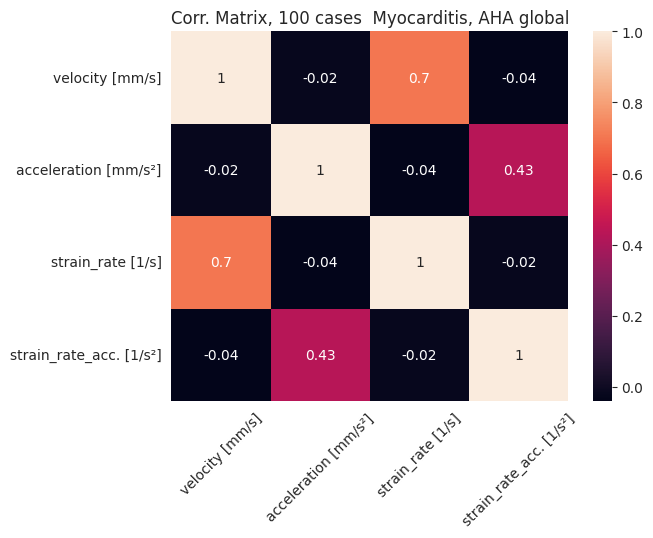

In [135]:
train_s, col_name = euclider(df_train, 'strain')
test_s, _ = euclider(df_test, 'strain')

train_v, _ = euclider(df_train, 'velocity')
test_v, _ = euclider(df_test, 'velocity')

train_a, _ = euclider(df_train, 'acceleration')
test_a, _ = euclider(df_test, 'acceleration')

train_sa, _ = euclider(df_train, 'strain-acc')
test_sa, _ = euclider(df_test, 'strain-acc')

def melter(df):
    x = df.melt()
    x = x.drop(x.columns[x.columns.str.contains('variable', case=False)], axis=1)
    return x

train_s = melter(train_s)
test_s = melter(test_s)

train_v = melter(train_v)
test_v = melter(test_v)

train_a = melter(train_a)
test_a = melter(test_a)

train_sa = melter(train_sa)
test_sa = melter(test_sa)

train = pd.concat((train_v, train_a, train_s, train_sa), axis=1)
train.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']
test = pd.concat((test_v, test_s, test_a, test_sa), axis=1)
test.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']

# g = sns.PairGrid(train, diag_sharey=False)
# g.fig.suptitle(f'Myocarditis, 35 cases, AHA global', y=0.98)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)
#
# file_path = f'/home/melandur/Pictures/images/overview/myocarditis_100_cases_AHA_global.png'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# plt.tight_layout()
# plt.savefig(file_path, dpi=300)
# plt.close()

matrix = train.corr().round(2)
sns.heatmap(matrix, annot=True, xticklabels=True, yticklabels=True)
plt.xticks(rotation=45)
plt.title(f'Corr. Matrix, 100 cases  Myocarditis, AHA global')
plt.show()

# file_path = f'/home/melandur/Pictures/images/overview/corr_matrix_myocarditis_100_cases_AHA_global.png'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# plt.tight_layout()
# plt.savefig(file_path, dpi=300)
# plt.close()

In [136]:
def rename_columns(df):
    column_names = df.columns
    new_names = []
    for name in column_names:
        new_names.append(f'{name}')
    df.columns = new_names
    return df

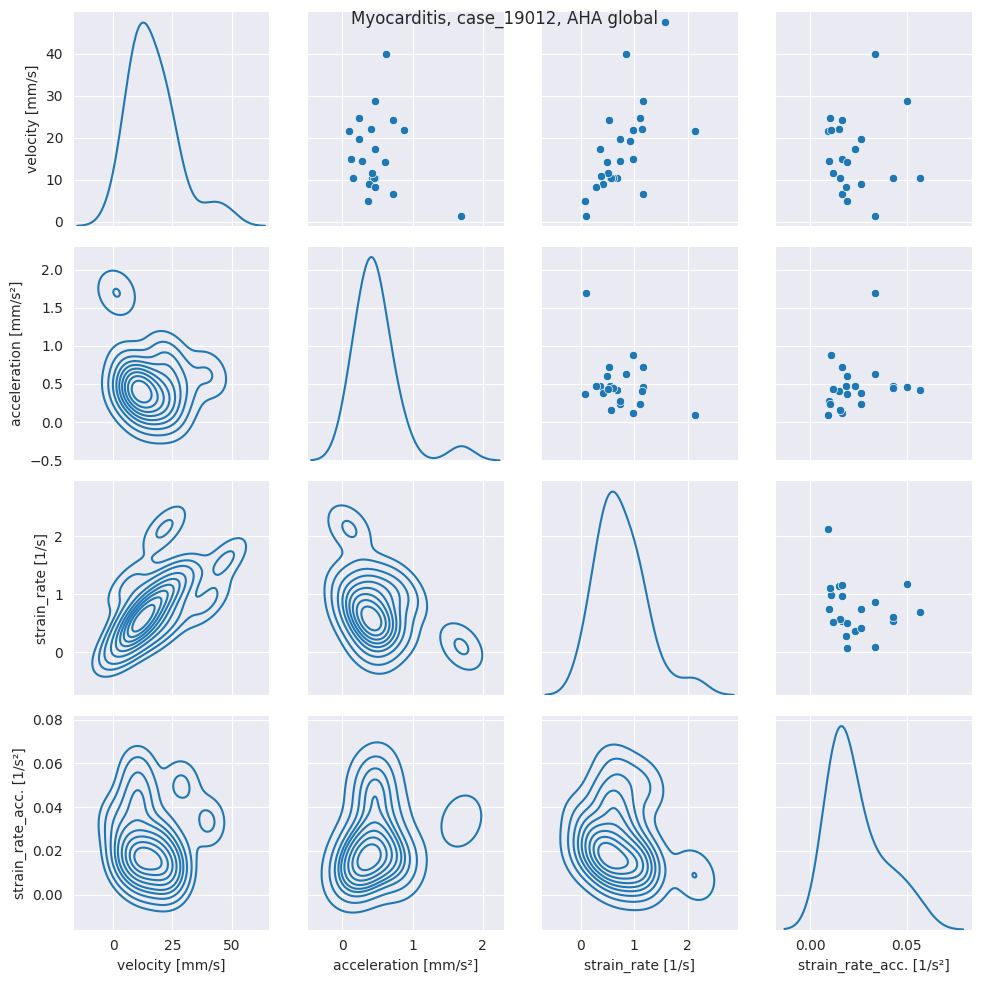

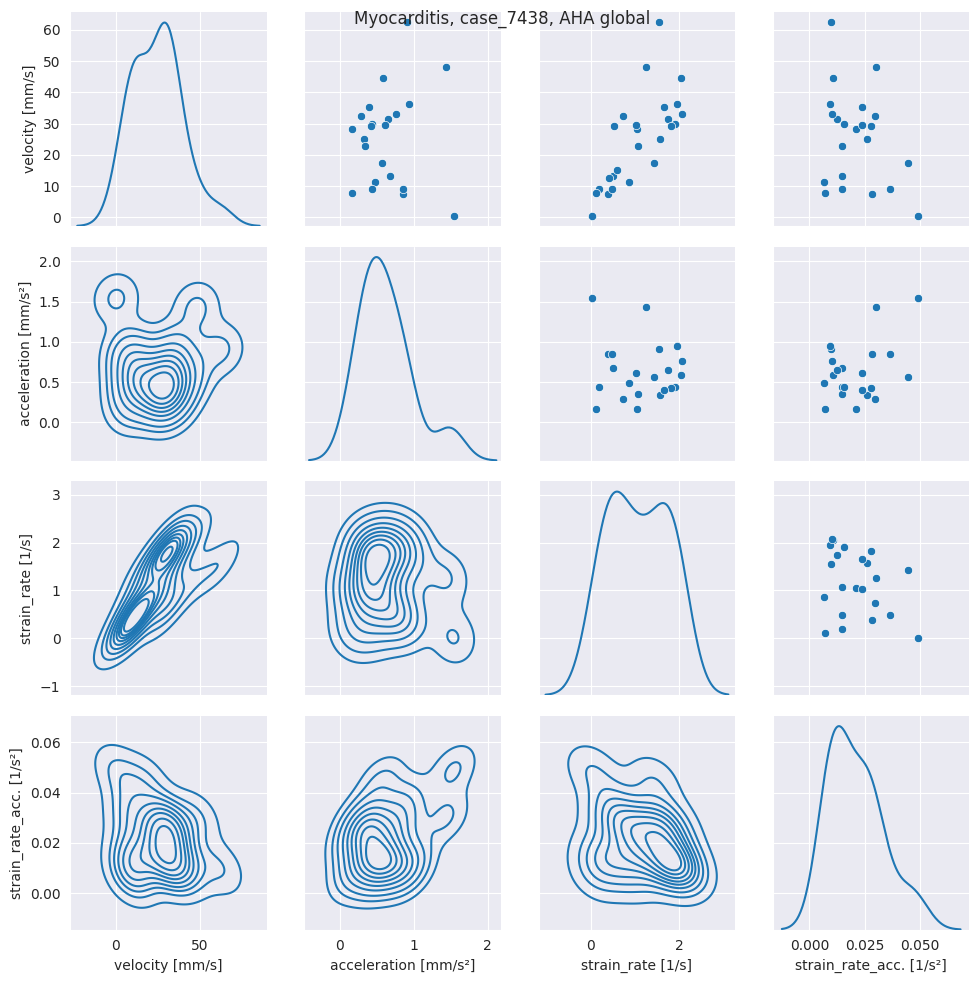


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f3374c91430> (for post_execute):


KeyboardInterrupt: 

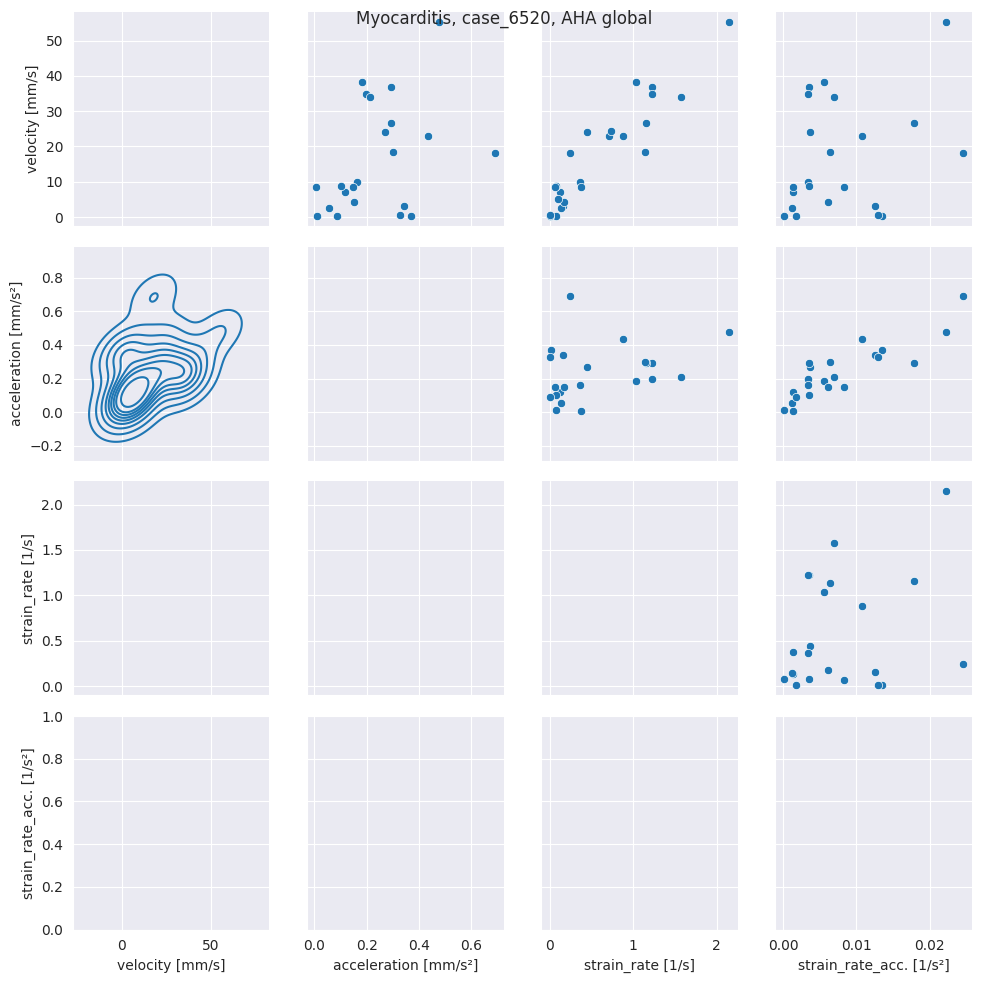

In [138]:
for case_number in range(1, 100):
    # there are only 35 test cases, comment test_* when running train
    train_v, col_name = euclider(df_train, 'velocity', min=case_number, max=case_number + 1)
    test_v, _ = euclider(df_test, 'velocity', min=case_number, max=case_number + 1)

    train_s, _ = euclider(df_train, 'strain', min=case_number, max=case_number + 1)
    test_s, _ = euclider(df_test, 'strain', min=case_number, max=case_number + 1)

    train_a, _ = euclider(df_train, 'acceleration', min=case_number, max=case_number + 1)
    test_a, _ = euclider(df_test, 'acceleration', min=case_number, max=case_number + 1)

    train_sa, _ = euclider(df_train, 'strain-acc', min=case_number, max=case_number + 1)
    test_sa, _ = euclider(df_test, 'strain-acc', min=case_number, max=case_number + 1)

    train = pd.concat((train_v, train_a, train_s, train_sa), axis=1)
    train.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']
    test = pd.concat((test_v, test_s, test_a, test_sa), axis=1)
    test.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']

    g = sns.PairGrid(train, diag_sharey=False)
    g.fig.suptitle(f'Myocarditis, {col_name}, AHA global', y=0.98)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot)
    plt.show()

    # file_path = f'/home/melandur/Pictures/images/test/{col_name}_AHA_global.png'
    # os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # plt.tight_layout()
    # plt.savefig(file_path, dpi=300)
    plt.close()

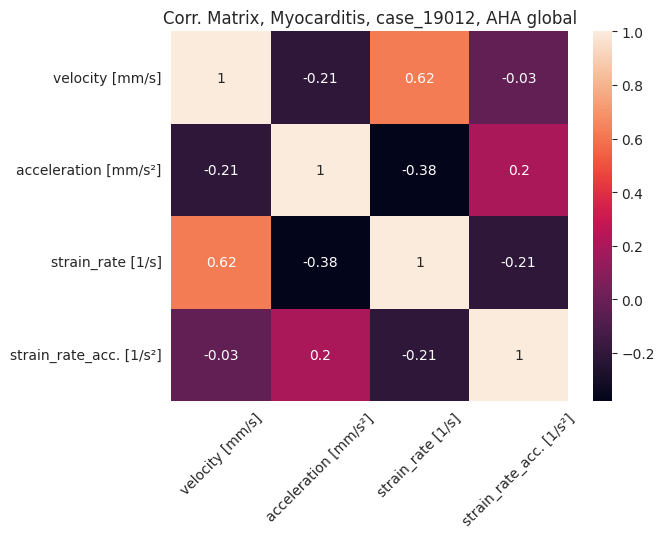

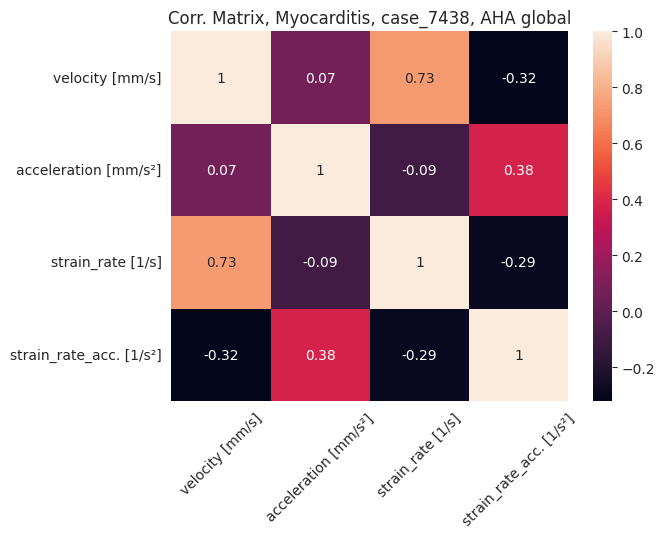

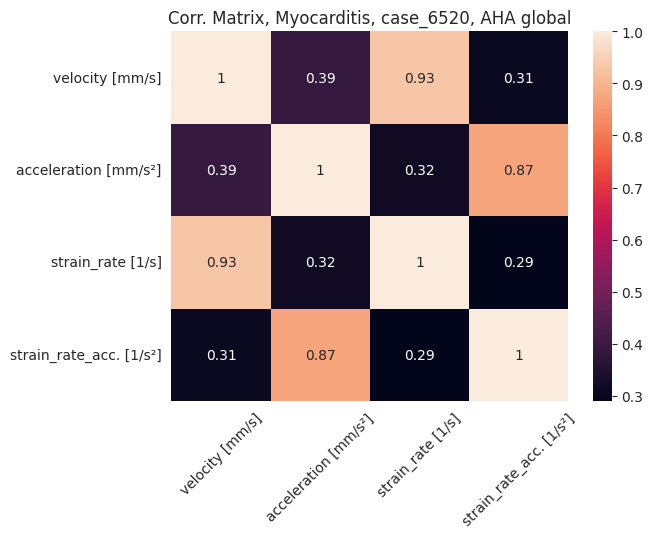

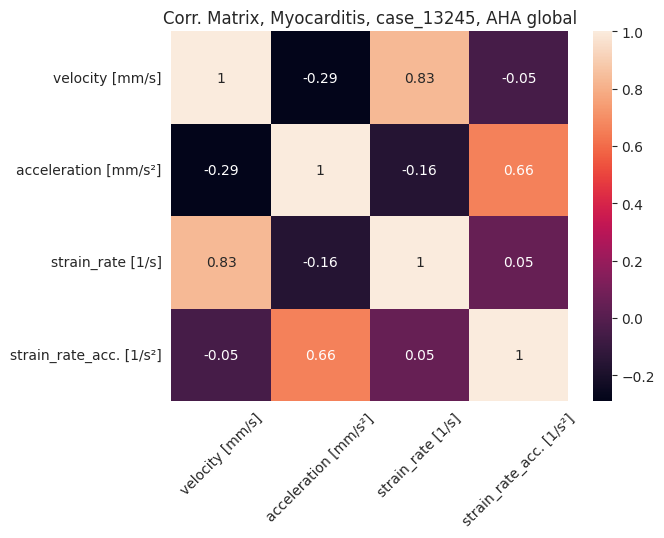

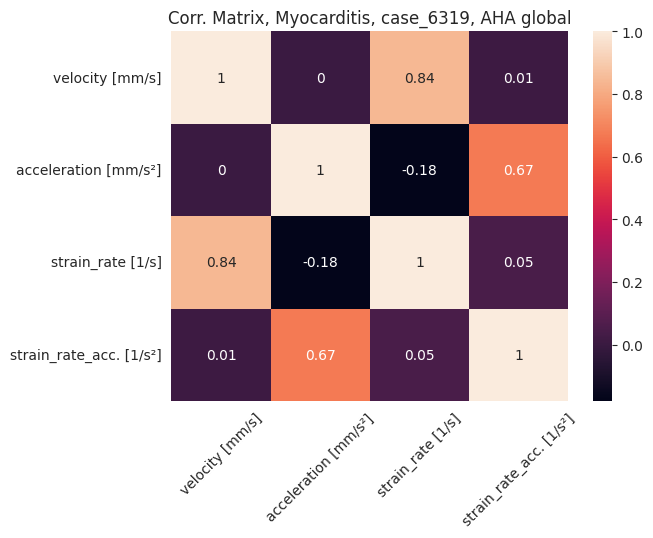

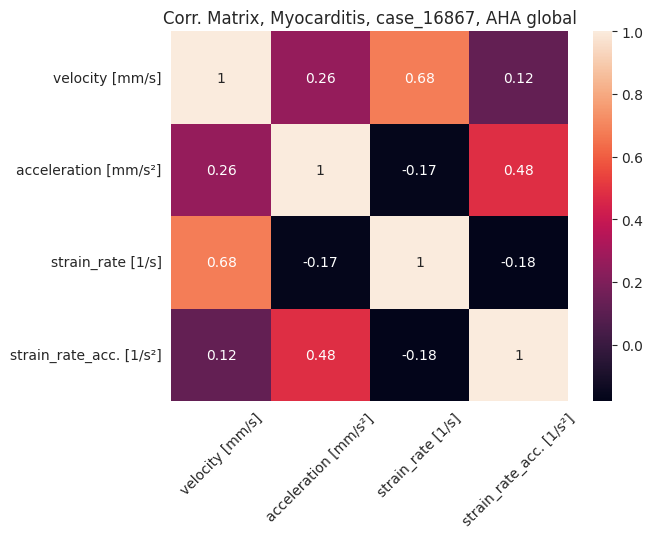

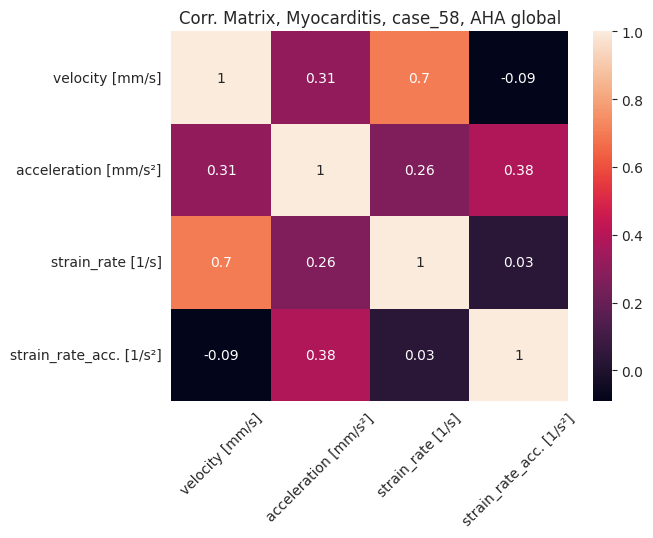

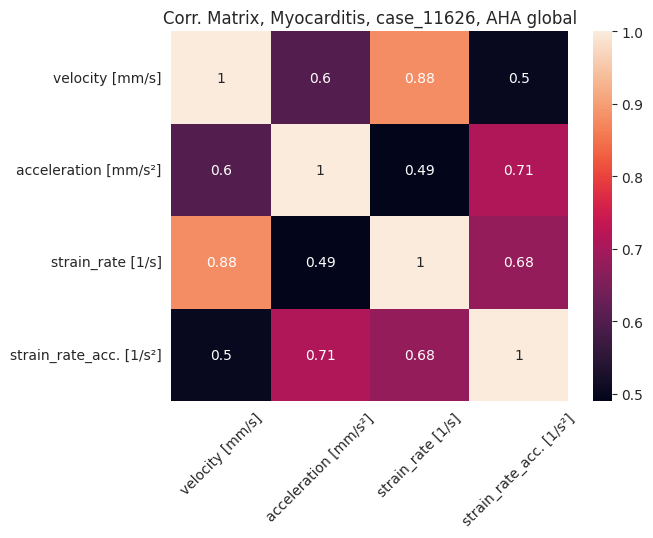

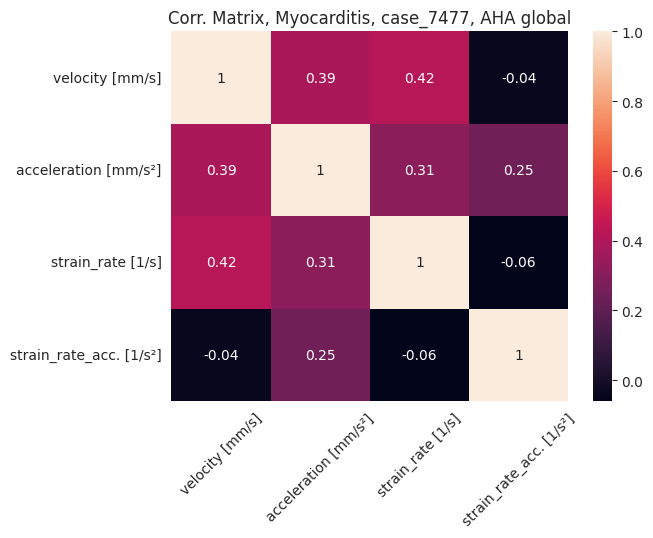

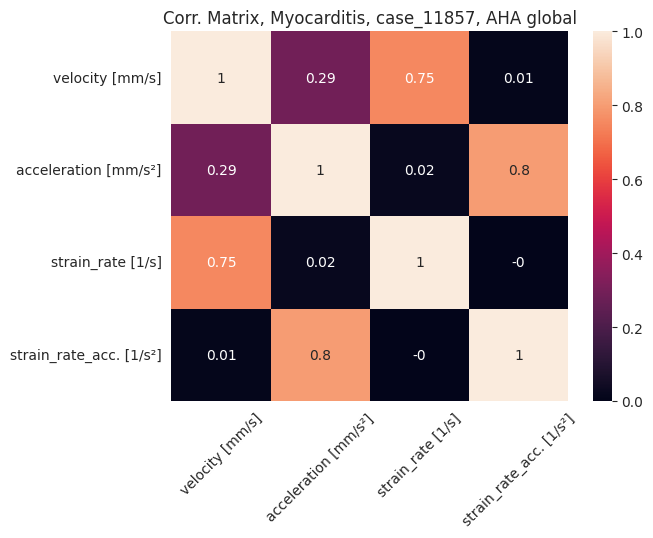

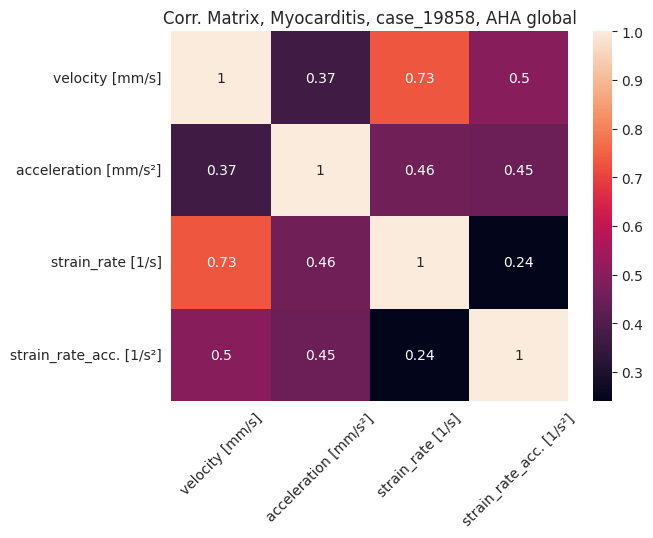

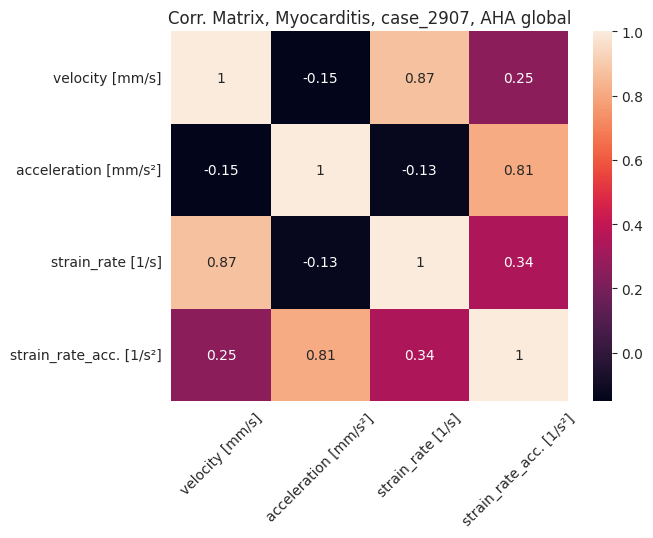

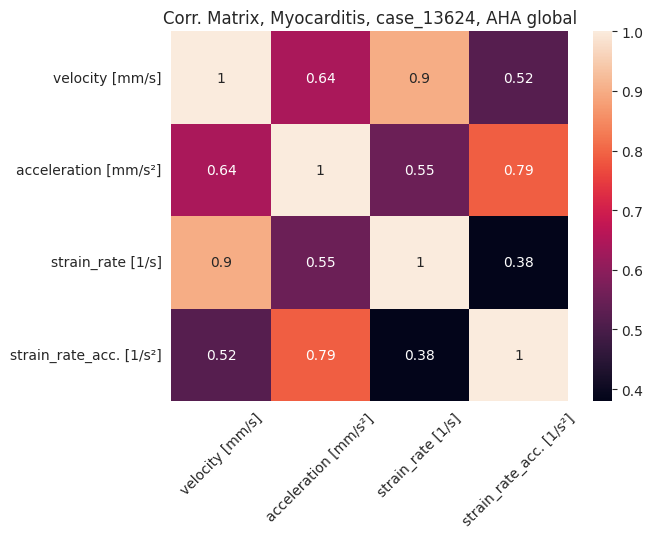

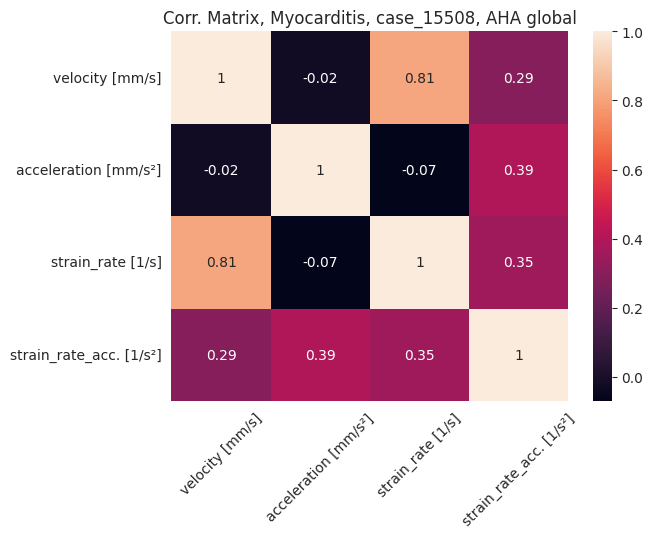

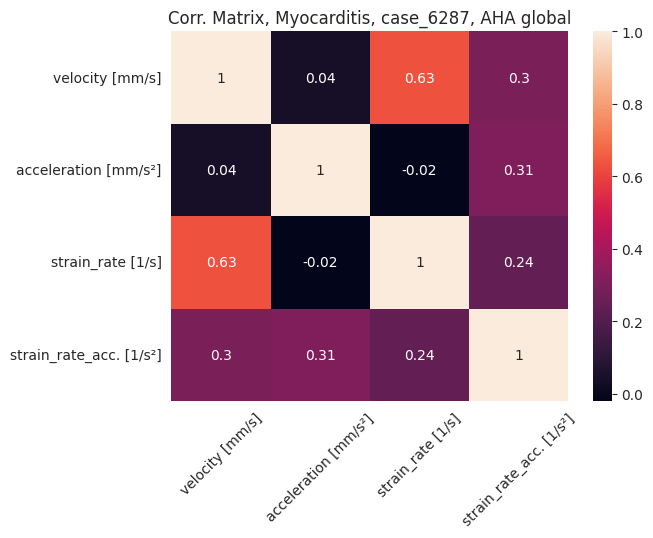

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f336c66fc10> (for post_execute):


KeyboardInterrupt: 

In [139]:
for case_number in range(1, 100):
    # there are only 35 test cases, comment test_* when running train
    train_v, col_name = euclider(df_train, 'velocity', min=case_number, max=case_number + 1)
    test_v, _ = euclider(df_test, 'velocity', min=case_number, max=case_number + 1)

    train_s, _ = euclider(df_train, 'strain', min=case_number, max=case_number + 1)
    test_s, _ = euclider(df_test, 'strain', min=case_number, max=case_number + 1)

    train_a, _ = euclider(df_train, 'acceleration', min=case_number, max=case_number + 1)
    test_a, _ = euclider(df_test, 'acceleration', min=case_number, max=case_number + 1)

    train_sa, _ = euclider(df_train, 'strain-acc', min=case_number, max=case_number + 1)
    test_sa, _ = euclider(df_test, 'strain-acc', min=case_number, max=case_number + 1)

    train = pd.concat((train_v, train_a, train_s, train_sa), axis=1)
    train.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']
    test = pd.concat((test_v, test_s, test_a, test_sa), axis=1)
    test.columns = ['velocity [mm/s]', 'acceleration [mm/s²]', 'strain_rate [1/s]', 'strain_rate_acc. [1/s²]']

    matrix = train.corr().round(2)
    sns.heatmap(matrix, annot=True, xticklabels=True, yticklabels=True)
    plt.xticks(rotation=45)
    plt.title(f'Corr. Matrix, Myocarditis, {col_name}, AHA global')
    plt.show()

    # file_path = f'/home/melandur/Pictures/images/train_corr/corr_matrix_{col_name}_AHA_global.png'
    # os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # plt.tight_layout()
    # plt.savefig(file_path, dpi=300)
    # plt.close()